# The Coordinate Clustering Module

On top of support for different clustering algorithms, sensAI provides useful methods specific to
clustering of geospatial data. They include utilities for wrangling geometrical data, spanning trees and for persisting and
visualizing the results. It seamlessly interoperates with geopandas and shapely.
This notebook gives an overview of the coordinate clustering's main functions


## Before running the notebook

Install the library and its dependencies with, if you haven't done so already
```
pip install -e .
```
from the root directory. You can also execute this command directly in the notebook but will need to reload the
kernel afterwards

In [1]:
# Note - this cell should be executed only once per session
%load_ext autoreload
%autoreload 2

import sys, os

# in order to get the config, it is not part of the library
os.chdir("..")
sys.path.append(os.path.abspath("."))

In [2]:
import os
import geopandas as gp
from pprint import pprint
import numpy as np

from sklearn.cluster import DBSCAN

import logging
from sensai.util.graph import CoordinateSpanningTree
from sensai.clustering.coordinate_clustering import SKLearnCoordinateClustering
from sensai.util.geometry import alphaShape
from config import get_config

logging.basicConfig(level=logging.INFO)
c = get_config(reload=True)

INFO:config.__Configuration:Reading configuration from /home/runner/work/sensAI/sensAI/config.json


## Loading and Fitting

The library contains utils for loading coordinates from files and for wrapping arbitrary scikit-learn compatible
clustering algorithms. Custom clustering algorithms can be implemented easily buy inheriting from the baseclass
`ClusteringModel`


In [3]:
sampleFile = c.datafile_path("sample", stage=c.RAW) # this can point to a directory or a shp/geojson file
sampleGeoDF = gp.read_file(sampleFile)
dbscan = SKLearnCoordinateClustering(DBSCAN(eps=150, min_samples=20))
dbscan.fit(sampleGeoDF)

INFO:sensai.clustering.base.clustering:Fitting SKLearnCoordinateClustering to 78782 coordinate datapoints.


INFO:sensai.clustering.base.clustering:SKLearnCoordinateClustering found 477 clusters


The resulting `CoordinateClusteringAlgorithm` instance has many useful methods.
You can retrieve clusters individually or via a generator. The noise cluster can be accessed individually

In [4]:
print(f"Clusters found: {dbscan.numClusters}")

clustersMin50 = list(dbscan.clusters(condition=lambda x: len(x) >= 50))

print(f"Clusters with at least 50 members: {len(clustersMin50)}")

INFO:sensai.clustering.base.clustering:Processed 0% of clusters


INFO:sensai.clustering.base.clustering:Processed 5% of clusters


INFO:sensai.clustering.base.clustering:Processed 10% of clusters


INFO:sensai.clustering.base.clustering:Processed 15% of clusters


INFO:sensai.clustering.base.clustering:Processed 20% of clusters


INFO:sensai.clustering.base.clustering:Processed 25% of clusters


INFO:sensai.clustering.base.clustering:Processed 30% of clusters


INFO:sensai.clustering.base.clustering:Processed 35% of clusters


INFO:sensai.clustering.base.clustering:Processed 40% of clusters


INFO:sensai.clustering.base.clustering:Processed 45% of clusters


INFO:sensai.clustering.base.clustering:Processed 50% of clusters


INFO:sensai.clustering.base.clustering:Processed 55% of clusters


INFO:sensai.clustering.base.clustering:Processed 60% of clusters


INFO:sensai.clustering.base.clustering:Processed 65% of clusters


INFO:sensai.clustering.base.clustering:Processed 70% of clusters


INFO:sensai.clustering.base.clustering:Processed 75% of clusters


INFO:sensai.clustering.base.clustering:Processed 80% of clusters


INFO:sensai.clustering.base.clustering:Processed 85% of clusters


Clusters found: 477


INFO:sensai.clustering.base.clustering:Processed 90% of clusters


INFO:sensai.clustering.base.clustering:Processed 95% of clusters


Clusters with at least 50 members: 154


## Analysis and Visualization

From the dbscan single clusters which are instances of `CoordinateClusteringAlgorithm.Cluster` 
can be retrieved and visualized. Most objects, including the dbscan itself, have an inbuilt plot method

INFO:sensai.clustering.base.clustering:Processed 0% of clusters


INFO:sensai.clustering.base.clustering:Processed 5% of clusters


INFO:sensai.clustering.base.clustering:Processed 10% of clusters


INFO:sensai.clustering.base.clustering:Processed 15% of clusters


INFO:sensai.clustering.base.clustering:Processed 20% of clusters


INFO:sensai.clustering.base.clustering:Processed 25% of clusters


INFO:sensai.clustering.base.clustering:Processed 30% of clusters


INFO:sensai.clustering.base.clustering:Processed 35% of clusters


INFO:sensai.clustering.base.clustering:Processed 40% of clusters


INFO:sensai.clustering.base.clustering:Processed 45% of clusters


INFO:sensai.clustering.base.clustering:Processed 50% of clusters


INFO:sensai.clustering.base.clustering:Processed 55% of clusters


INFO:sensai.clustering.base.clustering:Processed 60% of clusters


INFO:sensai.clustering.base.clustering:Processed 65% of clusters


INFO:sensai.clustering.base.clustering:Processed 70% of clusters


INFO:sensai.clustering.base.clustering:Processed 75% of clusters


INFO:sensai.clustering.base.clustering:Processed 80% of clusters


INFO:sensai.clustering.base.clustering:Processed 85% of clusters


INFO:sensai.clustering.base.clustering:Processed 90% of clusters


INFO:sensai.clustering.base.clustering:Processed 95% of clusters


INFO:sensai.util.tracking:Finished execution of toGeoDF in 16.06s


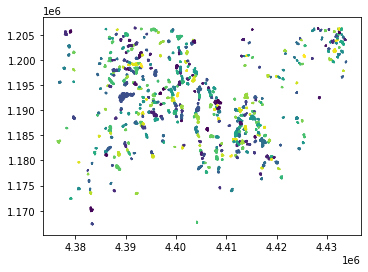

In [5]:
dbscan.plot(markersize=0.2)

We can condition before plotting as well as pass custom arguments

INFO:sensai.clustering.base.clustering:Processed 0% of clusters


INFO:sensai.clustering.base.clustering:Processed 5% of clusters


INFO:sensai.clustering.base.clustering:Processed 10% of clusters


INFO:sensai.clustering.base.clustering:Processed 15% of clusters


INFO:sensai.clustering.base.clustering:Processed 20% of clusters


INFO:sensai.clustering.base.clustering:Processed 25% of clusters


INFO:sensai.clustering.base.clustering:Processed 30% of clusters


INFO:sensai.clustering.base.clustering:Processed 35% of clusters


INFO:sensai.clustering.base.clustering:Processed 40% of clusters


INFO:sensai.clustering.base.clustering:Processed 45% of clusters


INFO:sensai.clustering.base.clustering:Processed 50% of clusters


INFO:sensai.clustering.base.clustering:Processed 55% of clusters


INFO:sensai.clustering.base.clustering:Processed 60% of clusters


INFO:sensai.clustering.base.clustering:Processed 65% of clusters


INFO:sensai.clustering.base.clustering:Processed 70% of clusters


INFO:sensai.clustering.base.clustering:Processed 75% of clusters


INFO:sensai.clustering.base.clustering:Processed 80% of clusters


INFO:sensai.clustering.base.clustering:Processed 85% of clusters


INFO:sensai.clustering.base.clustering:Processed 90% of clusters


INFO:sensai.clustering.base.clustering:Processed 95% of clusters


INFO:sensai.util.tracking:Finished execution of toGeoDF in 4.73s


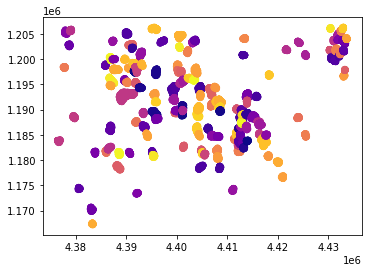

In [6]:
dbscan.plot(condition=lambda x: len(x) >= 50, cmap='plasma')

### Properties of a single cluster

Single clusters can be plotted too

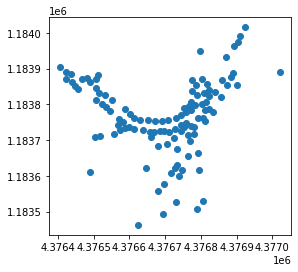

In [7]:
sampleCluster = dbscan.getCluster(0)

sampleCluster.plot()

Clusters have an identifier and coordinates. It is easy to extract additional information,
e.g. via the summary method

In [8]:
pprint(sampleCluster.summaryDict())

{'centroid': array([4376695.82252174, 1183767.04571391]),
 'identifier': 0,
 'numMembers': 115,
 'radius': 349.2315943771115}


A single cluster is just a wrapper around its coordinates. They can be
retrieved either as a numpy array, a geodataframe or a MultiPoint object.
The latter is useful for geometric operations, e.g. computing hulls

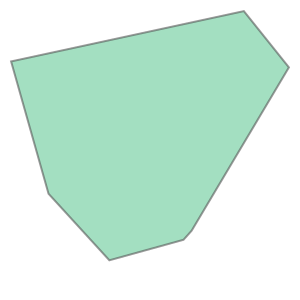

In [9]:
clusterMultipoint = sampleCluster.asMultipoint()
clusterMultipoint.convex_hull

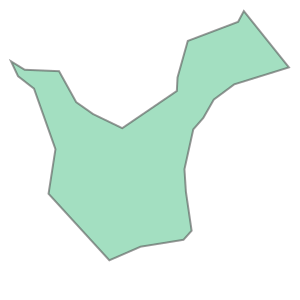

In [10]:
# we also provide a utility for computing alpha shapes for such objects

alphaShape(clusterMultipoint)

sensAI also provides utilities for computing trees, e.g. here for the minimal spanning tree

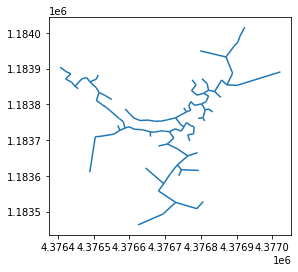

In [11]:
sampleTree = CoordinateSpanningTree(sampleCluster)
sampleTree.plot()

Most objects provide a way for extracting a summary from them, either as a dict or as a data frame

In [12]:
print("cluster summary:")
pprint(sampleCluster.summaryDict())

cluster summary:
{'centroid': array([4376695.82252174, 1183767.04571391]),
 'identifier': 0,
 'numMembers': 115,
 'radius': 349.2315943771115}


In [13]:
dbscan.summaryDF().head()

INFO:sensai.clustering.base.clustering:Processed 0% of clusters


INFO:sensai.clustering.base.clustering:Processed 5% of clusters


INFO:sensai.clustering.base.clustering:Processed 10% of clusters


INFO:sensai.clustering.base.clustering:Processed 15% of clusters


INFO:sensai.clustering.base.clustering:Processed 20% of clusters


INFO:sensai.clustering.base.clustering:Processed 25% of clusters


INFO:sensai.clustering.base.clustering:Processed 30% of clusters


INFO:sensai.clustering.base.clustering:Processed 35% of clusters


INFO:sensai.clustering.base.clustering:Processed 40% of clusters


INFO:sensai.clustering.base.clustering:Processed 45% of clusters


INFO:sensai.clustering.base.clustering:Processed 50% of clusters


INFO:sensai.clustering.base.clustering:Processed 55% of clusters


INFO:sensai.clustering.base.clustering:Processed 60% of clusters


INFO:sensai.clustering.base.clustering:Processed 65% of clusters


INFO:sensai.clustering.base.clustering:Processed 70% of clusters


INFO:sensai.clustering.base.clustering:Processed 75% of clusters


INFO:sensai.clustering.base.clustering:Processed 80% of clusters


INFO:sensai.clustering.base.clustering:Processed 85% of clusters


INFO:sensai.clustering.base.clustering:Processed 90% of clusters


INFO:sensai.clustering.base.clustering:Processed 95% of clusters


,centroid,numMembers,radius
identifier,,,
0,"[4376695.82252174, 1183767.045713913]",115,349.231594
1,"[4376876.279427272, 1195560.675918182]",44,223.324669
2,"[4377779.652260293, 1198338.2656926473]",68,246.582618
3,"[4378073.775288462, 1205306.8416676929]",130,466.581354
4,"[4378265.649890477, 1186429.8616714287]",21,158.661667


## Saving and Loading

All of the objects used above can be exported to a GeoDataFrame using the `toGeoDF` method. This geodataframe
can then be persisted as usual.

In addition to that `CoordinateClusteringAlgorithm` has its own save method which persists the object as pickle.
An instance can be loaded using the load classmethod.
This way of persisting the fitted algorithm is _much more efficient and general_ than saving the corresponding gdf

Individual clusters themselves also have saving and loading methods,
with the difference that they are persisted as (and instantiated from) shapefiles.

In [14]:
dbscanGeoDF = dbscan.toGeoDF() # here again a condition for filtering clusters can be passed
clusterGeoDF = sampleCluster.toGeoDF()
treeGeoDF = sampleTree.toGeoDF()
dbscanGeoDF.head()

INFO:sensai.clustering.base.clustering:Processed 0% of clusters


INFO:sensai.clustering.base.clustering:Processed 5% of clusters


INFO:sensai.clustering.base.clustering:Processed 10% of clusters


INFO:sensai.clustering.base.clustering:Processed 15% of clusters


INFO:sensai.clustering.base.clustering:Processed 20% of clusters


INFO:sensai.clustering.base.clustering:Processed 25% of clusters


INFO:sensai.clustering.base.clustering:Processed 30% of clusters


INFO:sensai.clustering.base.clustering:Processed 35% of clusters


INFO:sensai.clustering.base.clustering:Processed 40% of clusters


INFO:sensai.clustering.base.clustering:Processed 45% of clusters


INFO:sensai.clustering.base.clustering:Processed 50% of clusters


INFO:sensai.clustering.base.clustering:Processed 55% of clusters


INFO:sensai.clustering.base.clustering:Processed 60% of clusters


INFO:sensai.clustering.base.clustering:Processed 65% of clusters


INFO:sensai.clustering.base.clustering:Processed 70% of clusters


INFO:sensai.clustering.base.clustering:Processed 75% of clusters


INFO:sensai.clustering.base.clustering:Processed 80% of clusters


INFO:sensai.clustering.base.clustering:Processed 85% of clusters


INFO:sensai.clustering.base.clustering:Processed 90% of clusters


INFO:sensai.clustering.base.clustering:Processed 95% of clusters


INFO:sensai.util.tracking:Finished execution of toGeoDF in 10.26s


,geometry
identifier,
0,"MULTIPOINT (4376405.982 1183903.847, 4376421.3..."
1,"MULTIPOINT (4376700.416 1195503.201, 4376709.4..."
2,"MULTIPOINT (4377538.080 1198386.015, 4377561.8..."
3,"MULTIPOINT (4377825.214 1205091.938, 4377840.9..."
4,"MULTIPOINT (4378139.532 1186424.797, 4378165.9..."


In [15]:
dbscanSavedPath = os.path.join(c.temp, f"{dbscan}_sample.pickle")
clusterSavedPath = os.path.join(c.temp, f"sampleCluster_{sampleCluster.identifier}")


dbscan.save(dbscanSavedPath)
sampleCluster.save(clusterSavedPath)

INFO:sensai.clustering.coordinate_clustering:Saving instance of Cluster as shapefile to /home/runner/work/sensAI/sensAI/temp/sampleCluster_0


In [16]:
loadedDBSCAN = SKLearnCoordinateClustering.load(dbscanSavedPath)
loadedCluster = SKLearnCoordinateClustering.Cluster.load(clusterSavedPath)

INFO:sensai.util.cache:Loading instance of <class 'sensai.clustering.coordinate_clustering.SKLearnCoordinateClustering'> from /home/runner/work/sensAI/sensAI/temp/SKLearnCoordinateClustering_sample.pickle


INFO:sensai.clustering.coordinate_clustering:Loading instance of Cluster from /home/runner/work/sensAI/sensAI/temp/sampleCluster_0


In [17]:
# The loaded objects are equal to the ones we persisted

print(loadedCluster.identifier == sampleCluster.identifier)
print(np.array_equal(sampleCluster.datapoints, loadedDBSCAN.getCluster(0).datapoints))

# Cleaning up
import shutil

shutil.rmtree(clusterSavedPath)
os.remove(dbscanSavedPath)

True
True
